<a href="https://colab.research.google.com/github/Bschreff/food-sales--prediction/blob/main/GitHub_Rep_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#" Sales Predictions"
  - Brian Schreffler 

In [3]:
import pandas as pd
filename = '/content/drive/MyDrive/02 Week 2: Pandas/sales_predictions.csv'

In [4]:
sales_predictions = pd.read_csv(filename)
sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##"Data Cleaning"

In [5]:
sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
sales_predictions.shape

(8523, 12)

In [7]:
sales_predictions.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
sales_predictions.duplicated().sum()

0

In [9]:
sales_predictions.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
sales_predictions.isna().sum() / len(sales_predictions) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [11]:
median_weight = sales_predictions['Item_Weight'].median()
sales_predictions['Item_Weight'].fillna(median_weight, inplace = True)
sales_predictions.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
sales_predictions.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
sales_predictions['Outlet_Size'].fillna('Missing', inplace=True)

In [14]:
sales_predictions.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
sales_predictions.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [16]:
sales_predictions['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [17]:
sales_predictions.replace(['LF', 'low fat', 'reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace = True)

In [18]:
sales_predictions['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

##"Exploratory Visuals"

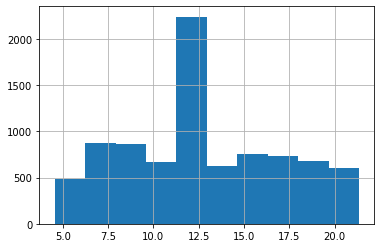

In [20]:
sales_predictions['Item_Weight'].hist();

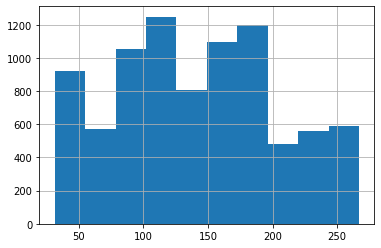

In [21]:
sales_predictions['Item_MRP'].hist();

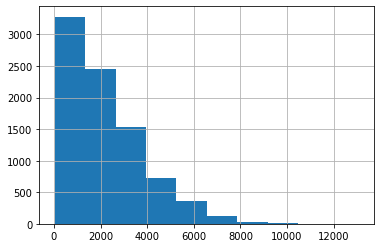

In [22]:
sales_predictions['Item_Outlet_Sales'].hist();

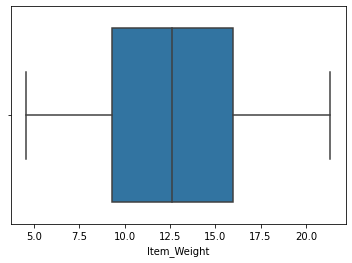

In [23]:
sns.boxplot(data=sales_predictions, x='Item_Weight')

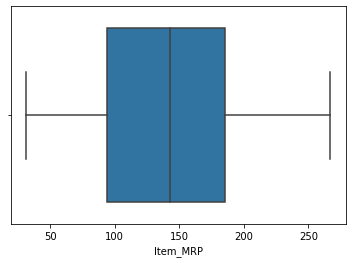

In [24]:
sns.boxplot(data=sales_predictions, x= 'Item_MRP')

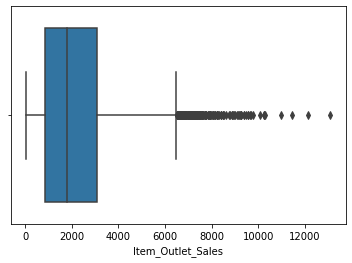

In [25]:
sns.boxplot(data=sales_predictions, x='Item_Outlet_Sales')

In [26]:
corr = sales_predictions.corr()

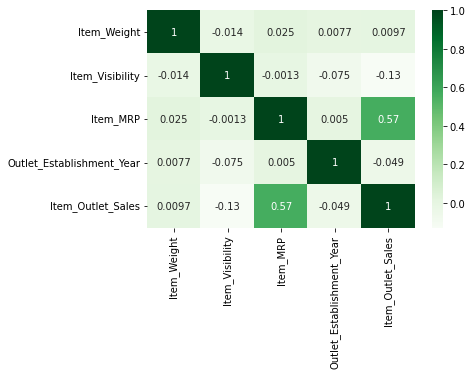

In [27]:
sns.heatmap(corr, cmap = 'Greens', annot = True)

##"Explanatory Visuals"

In [28]:
sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [29]:
item_mrp = sales_predictions.groupby(['Item_Type'])['Item_MRP'].mean().reset_index().sort_values('Item_MRP')
item_mrp

,Item_Type,Item_MRP
0,Baking Goods,126.380766
8,Health and Hygiene,130.818921
14,Soft Drinks,131.492506
11,Others,132.851430
7,Hard Drinks,137.077928
5,Frozen Foods,138.503366
3,Canned,139.763832
10,Meat,139.882032
1,Breads,140.952669
2,Breakfast,141.788151


In [30]:
item_sales = sales_predictions.groupby(['Item_Type'])['Item_Outlet_Sales'].mean().reset_index().sort_values('Item_Outlet_Sales')
item_sales

,Item_Type,Item_Outlet_Sales
11,Others,1926.139702
0,Baking Goods,1952.971207
14,Soft Drinks,2006.511735
8,Health and Hygiene,2010.000265
2,Breakfast,2111.808651
5,Frozen Foods,2132.867744
7,Hard Drinks,2139.221622
10,Meat,2158.977911
1,Breads,2204.132226
3,Canned,2225.194904


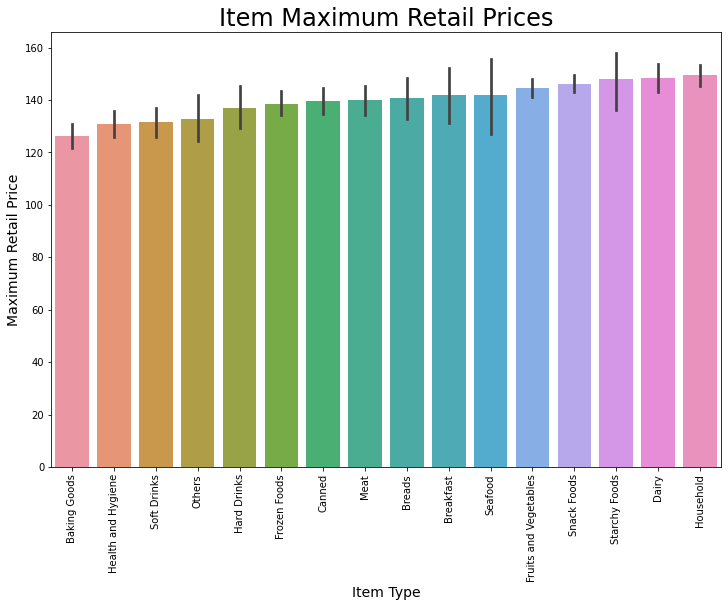

In [31]:
plt.figure(figsize=(12,8))
sns.barplot(x='Item_Type', y="Item_MRP", data=sales_predictions,  order=item_mrp['Item_Type'])
plt.xticks(rotation=90)
plt.ylabel('Maximum Retail Price', fontsize=14)
plt.xlabel('Item Type', fontsize=14);
plt.title('Item Maximum Retail Prices',fontsize=24);

The Graph above shows the average cost of everyday items.

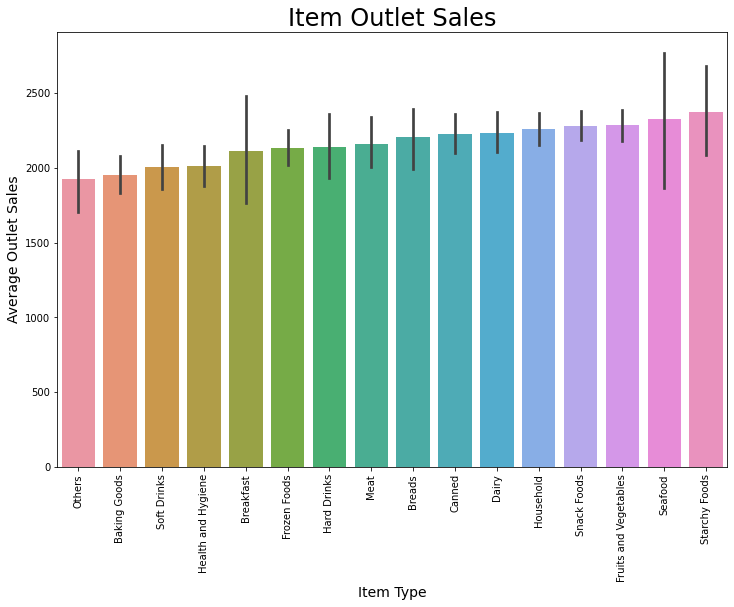

In [32]:
plt.figure(figsize=(12,8))
sns.barplot(x='Item_Type', y="Item_Outlet_Sales", data=sales_predictions,  order=item_sales['Item_Type'])
plt.xticks(rotation=90)
plt.ylabel('Average Outlet Sales', fontsize=14)
plt.xlabel('Item Type', fontsize=14);
plt.title('Item Outlet Sales',fontsize=24);

The graph shows on average what people are spending money on.

## Model Pedictions

In [95]:
path = '/content/drive/MyDrive/04 Week 4: Explanatory Viz/sales_predictions.csv'
df = pd.read_csv(path)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Imports

In [96]:
## Typical Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display = 'diagram')

### Performing Processing

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [98]:
df.drop(columns = 'Item_Identifier', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [99]:
df.drop(columns = 'Outlet_Identifier', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [100]:
#Check for duplicates
df.duplicated().sum()

0

In [101]:
df.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [102]:
#Fixing bad inconsistant values
df.replace(['LF', 'low fat', 'reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace = True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [103]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

## Changing Ordinal Data

In [104]:
replacement_size = {'Medium': 1, 'Small': 0, 'High': 2}
df['Outlet_Size'].replace(replacement_size, inplace = True)
df['Outlet_Size']

0       1.0
1       1.0
2       1.0
3       NaN
4       2.0
       ... 
8518    2.0
8519    NaN
8520    0.0
8521    1.0
8522    0.0
Name: Outlet_Size, Length: 8523, dtype: float64

## Define X and y

In [105]:
#Validation Split
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [106]:
# Instantiate Column Selectors
cat_selector = make_column_selector(dtype_include = 'object')
num_selector = make_column_selector(dtype_include = 'number')

In [107]:
# Instantiate Transformers
freq_imputer = SimpleImputer(strategy = 'most_frequent')
mean_imputer = SimpleImputer(strategy = 'mean')
scaler = StandardScaler()
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [108]:
# Instantiate Pipeline for numeric columns
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [109]:
# Instantiate Pipeline for categorical columns
category_pipe = make_pipeline(freq_imputer, ohe)
category_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [110]:
# Instantiate Column Transformer
num_tuple = (numeric_pipe, num_selector)
category_tuple = (category_pipe, cat_selector)

preprocessor = make_column_transformer(num_tuple, category_tuple, remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f5c529520>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f5c529880>)])

In [111]:
# Transform data
preprocessor.fit(X_train)

X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [112]:
# Inspect result
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('Shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


Shape of data is (6392, 30)




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

## Linear Regression Model

In [113]:
# import libraries
# Pandas
import pandas as pd
## Numpy
import numpy as np
## MatPlotLib
import matplotlib.pyplot as plt

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

## Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.ensemble import BaggingRegressor
## Regression Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Tree Model Visualization
from sklearn.tree import plot_tree

## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

In [114]:
lin_reg = LinearRegression()
lin_reg_pipe = make_pipeline(preprocessor, lin_reg)
lin_reg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f5c529520>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f5c529880>)])),
                ('linearregression', LinearRegression())])

In [115]:
lin_reg_pipe.fit(X_train, y_train)
train_pred = lin_reg_pipe.predict(X_train)
test_pred = lin_reg_pipe.predict(X_test)

In [116]:
# Mean Absolute Error
train_MAE = np.mean(np.abs(train_pred-y_train))
test_MAE = np.mean(np.abs(test_pred-y_test))
print(f'Model Traing MSE: {train_MAE}')
print(f'Model Test MSE: {test_MAE}')

Model Traing MSE: 847.5340959104043
Model Test MSE: 805.3909846441046


In [117]:
# Mean Squared Error
train_MSE = np.mean(np.abs(train_pred-y_train)**2)
test_MSE = np.mean(np.abs(test_pred-y_test)**2)
print(f'Model Traing MSE: {train_MSE}')
print(f'Model Test MSE: {test_MSE}')

Model Traing MSE: 1300485.3347374715
Model Test MSE: 1197831.2718361712


In [118]:
# Root Mean Squared Error
train_RMSE = np.sqrt(np.mean(np.abs(train_pred-y_train))**2)
test_RMSE = np.sqrt(np.mean(np.abs(test_pred-y_test))**2)
print(f'Model Traing RMSE: {train_RMSE}')
print(f'Model Test RMSE: {test_RMSE}')

Model Traing RMSE: 847.5340959104043
Model Test RMSE: 805.3909846441046


In [119]:
# R2
train_r2 = np.corrcoef(y_train, train_pred)[0][1]**2
test_r2 = np.corrcoef(y_test, test_pred)[0][1]**2
print(f'Model Traing R2: {train_r2}')
print(f'Model Test R2: {test_r2}')

Model Traing R2: 0.5605660416716673
Model Test R2: 0.5665834795880633


## Create Function

In [120]:
# Create Function
def model_metrics(pipe, x_train, y_train, x_test, y_test, model_name = 'Regression Model', ):
  
  mae = round(mean_squared_error(y_train, pipe.predict(x_train)),4)
  mse = round(mean_squared_error(y_train, pipe.predict(x_train)),4)
  rmse = round(np.sqrt(mean_squared_error(y_train, pipe.predict(x_train))),4)
  r2 = round(r2_score(y_train, pipe.predict(x_train)),7)
  print(f'{model_name} Train Scores')
  print(f'MAE: {mae} \nMSE: {mse} \nRMSE: {rmse}, \nR2: {r2}\n')

  mae = round(mean_squared_error(y_test, pipe.predict(x_test)),4)
  mse = round(mean_squared_error(y_test, pipe.predict(x_test)),4)
  rmse = round(np.sqrt(mean_squared_error(y_test, pipe.predict(x_test))),4)
  r2 = round(r2_score(y_test, pipe.predict(x_test)),7)
  print(f'{model_name} Test Scores')
  print(f'MAE: {mae} \nMSE: {mse} \nRMSE: {rmse}, \nR2: {r2}\n')

###Baseline Model

In [121]:
# Create instance for dummy model
dummy = DummyRegressor(strategy='mean')
dummy_pipe = make_pipeline(preprocessor, dummy)
dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f5c529520>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f5c529880>)])),
                ('dummyregressor', DummyRegressor())])

In [122]:
model_metrics(dummy_pipe, x_train = X_train, y_train = y_train,
              x_test = X_test, y_test = y_test,model_name = 'Dummy Model')

Dummy Model Train Scores
MAE: 2959455.7045 
MSE: 2959455.7045 
RMSE: 1720.3069, 
R2: 0.0

Dummy Model Test Scores
MAE: 2772144.4627 
MSE: 2772144.4627 
RMSE: 1664.9758, 
R2: -0.0047725



###Decision Tree model

In [123]:
dec_tree = DecisionTreeRegressor(max_depth=1, random_state=42)
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f5c529520>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f5c529880>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=1, random_state=42))])

In [124]:
model_metrics(dec_tree_pipe, x_train = X_train, y_train = y_train,
              x_test = X_test, y_test = y_test,model_name = 'Decision Tree')

Decision Tree Train Scores
MAE: 2255705.5459 
MSE: 2255705.5459 
RMSE: 1501.9006, 
R2: 0.2377972

Decision Tree Test Scores
MAE: 2125288.2422 
MSE: 2125288.2422 
RMSE: 1457.8368, 
R2: 0.2296826



In [125]:
dec_tree = DecisionTreeRegressor(max_depth=None, random_state=42)
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f5c529520>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f5c529880>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [126]:
model_metrics(dec_tree_pipe, x_train = X_train, y_train = y_train,
              x_test = X_test, y_test = y_test,model_name = 'Decision Tree 2')

Decision Tree 2 Train Scores
MAE: 0.0 
MSE: 0.0 
RMSE: 0.0, 
R2: 1.0

Decision Tree 2 Test Scores
MAE: 2163146.5754 
MSE: 2163146.5754 
RMSE: 1470.7639, 
R2: 0.2159607



In [127]:
max_depth = dec_tree_pipe['decisiontreeregressor'].get_depth()
max_depth

40

In [128]:
#Create for loop to find max_depth
depths = range(1, max_depth+1)
scores = pd.DataFrame(index = depths, columns = ['Train Score', 'Test Score'])
for depth in depths:
  dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
  dec_tree_pipe=make_pipeline(preprocessor, dec_tree)
  dec_tree_pipe.fit(X_train, y_train)
  train_pred = dec_tree_pipe.predict(X_train)
  test_pred = dec_tree_pipe.predict(X_test)
  train_r2score=r2_score(y_train, train_pred)
  test_r2score=r2_score(y_test, test_pred)
  scores.loc[depth, 'Train Score'] = train_r2score
  scores.loc[depth, 'Test Score'] = test_r2score

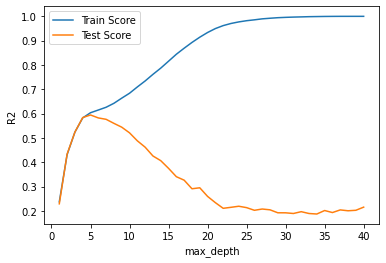

In [129]:
# create visualazation of R2 versus max depth
plt.plot(depths, scores['Train Score'], label= 'Train Score')
plt.plot(depths, scores['Test Score'], label= 'Test Score')
plt.xlabel('max_depth')
plt.ylabel('R2')
plt.legend()
plt.show()

In [130]:
sort_scores = scores.sort_values(by='Test Score', ascending=False)
sort_scores.head()

,Train Score,Test Score
5,0.60394,0.59471
4,0.582625,0.584005
6,0.615072,0.582587
7,0.626454,0.576843
8,0.642714,0.560245


In [131]:
best_depth = sort_scores.index[0]
best_depth

5

In [132]:
# depth of 5 performed the best
dec_tree = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f5c529520>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f5c529880>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=5, random_state=42))])

In [133]:
model_metrics(dec_tree_pipe, x_train = X_train, y_train = y_train,
              x_test = X_test, y_test = y_test,model_name = 'Best Fit Decision Tree')

Best Fit Decision Tree Train Scores
MAE: 1172122.7729 
MSE: 1172122.7729 
RMSE: 1082.6462, 
R2: 0.6039397

Best Fit Decision Tree Test Scores
MAE: 1118185.9731 
MSE: 1118185.9731 
RMSE: 1057.4431, 
R2: 0.59471



###Bagged Tree Model

In [134]:
# Make instance of Model and look at hyperparameters
bagreg = BaggingRegressor(random_state=42)
bag_tree_pipe = make_pipeline(preprocessor, bagreg)
bag_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f5c529520>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f5c529880>)])),
                ('baggingregressor', BaggingRegressor(random_state=42))])

In [135]:
model_metrics(bag_tree_pipe, x_train = X_train, y_train = y_train,
              x_test = X_test, y_test = y_test,model_name = 'Bagged Tree Model')

Bagged Tree Model Train Scores
MAE: 239613.2647 
MSE: 239613.2647 
RMSE: 489.5031, 
R2: 0.9190347

Bagged Tree Model Test Scores
MAE: 1303207.2228 
MSE: 1303207.2228 
RMSE: 1141.581, 
R2: 0.5276484



In [136]:
# Bag Tree get params
bagreg.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [137]:
# Tune Model
estimators = [5, 10, 15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
scores = pd.DataFrame(index=estimators, columns=['Train Score','Test Score'])

for num_estimators in estimators:
  bag_reg = BaggingRegressor(n_estimators=num_estimators, random_state=42)
  bag_tree_pipe = make_pipeline(preprocessor, bag_reg)
  bag_tree_pipe.fit(X_train, y_train)
  train_pred = bag_tree_pipe.predict(X_train)
  test_pred = bag_tree_pipe.predict(X_test)
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)
  scores.loc[num_estimators, 'Train Score'] = train_r2score
  scores.loc[num_estimators, 'Test Score'] = test_r2score

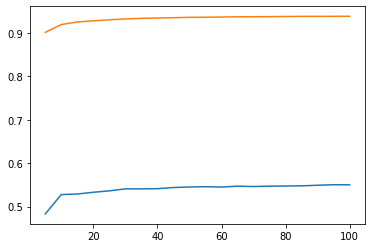

In [138]:
# Plot Model
plt.plot(scores['Test Score'])
plt.plot(scores['Train Score'])
plt.show();

In [139]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Train Score,Test Score
95,0.937913,0.550369
100,0.938113,0.550075
90,0.937849,0.549107
85,0.937817,0.547764
80,0.937564,0.547381


In [140]:
# Save index with best Test score 
best_n_estimator = scores.index[0]

In [141]:
# Create instance of model
bagreg = BaggingRegressor(n_estimators=best_n_estimator, random_state=42)
bag_tree_pipe = make_pipeline(preprocessor, bagreg)
bag_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f5c529520>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f5c529880>)])),
                ('baggingregressor',
                 BaggingRegressor(n_estimators=5, random_state=42))])

In [142]:
model_metrics(bag_tree_pipe, x_train = X_train, y_train = y_train,
              x_test = X_test, y_test = y_test,model_name = 'Tuned Bagged Tree Model')

Tuned Bagged Tree Model Train Scores
MAE: 293166.3257 
MSE: 293166.3257 
RMSE: 541.4484, 
R2: 0.9009391

Tuned Bagged Tree Model Test Scores
MAE: 1425987.1378 
MSE: 1425987.1378 
RMSE: 1194.147, 
R2: 0.4831465



###Create Random Forest

In [143]:
# Get params
rf = RandomForestRegressor(random_state=42)
rf_pipe = make_pipeline(preprocessor, rf)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [144]:
# Fit Model
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f5c529520>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f5c529880>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [145]:
model_metrics(rf_pipe, x_train = X_train, y_train = y_train,
              x_test = X_test, y_test = y_test, model_name = 'Random Forest Model')

Random Forest Model Train Scores
MAE: 183946.3379 
MSE: 183946.3379 
RMSE: 428.8897, 
R2: 0.9378445

Random Forest Model Test Scores
MAE: 1235513.7977 
MSE: 1235513.7977 
RMSE: 1111.5367, 
R2: 0.5521841



In [146]:
# Get depth
est_depth = [estimator.get_depth() for estimator in rf.estimators_]
max_depth = max(est_depth)
max_depth

43

In [147]:
# Tune max_depth
depths = range(1, 43)
scores = pd.DataFrame(index=depths, columns=['Train Scores','Test Scores'])
for depth in depths:
  rf = RandomForestRegressor(max_depth= depth)
  rf_pipe =make_pipeline(preprocessor, rf)
  rf_pipe.fit(X_train, y_train)
  train_pred = rf_pipe.predict(X_train)
  test_pred = rf_pipe.predict(X_test)
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)
  scores.loc[depth,'Train Scores'] = train_r2score
  scores.loc[depth, 'Test Scores'] = test_r2score

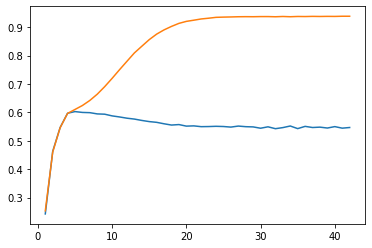

In [148]:
#Plot change in scores to gain insight
plt.plot(scores['Test Scores'])
plt.plot(scores['Train Scores'])
plt.show()

In [149]:
sorted_scores = scores.sort_values(by='Test Scores', ascending=False)
sorted_scores.head()

,Train Scores,Test Scores
5,0.610439,0.60295
6,0.624398,0.600005
7,0.642215,0.599169
4,0.596552,0.59718
8,0.664256,0.594792


In [150]:
best_depth = sorted_scores.index[0]
best_depth

5

In [151]:
# Best Version
rf = RandomForestRegressor(max_depth=best_depth, random_state=42)
rf_pipe = make_pipeline(preprocessor, rf)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f5c529520>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f5c529880>)])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=5, random_state=42))])

In [152]:
model_metrics(rf_pipe, x_train = X_train, y_train = y_train,
              x_test = X_test, y_test = y_test, model_name = 'Tuned Random Forest Model')

Tuned Random Forest Model Train Scores
MAE: 1152591.6055 
MSE: 1152591.6055 
RMSE: 1073.5882, 
R2: 0.6105393

Tuned Random Forest Model Test Scores
MAE: 1096507.6084 
MSE: 1096507.6084 
RMSE: 1047.1426, 
R2: 0.6025674



## Random Forest Model Observations
- Here are the best results of the models used.
- Random Forest performs the best on the testing data.
-The R^2 score 60.1% of the variance is explained.

# Overall Recomendation

##Sales Insights
- These are the top selling items in terms of money 
  - Household	2258.784300
  - Snack Foods	2277.321739
  - Fruits and Vegetables	2289.009592
  - Seafood	2326.065928
  - Starchy Foods	2374.332773 

##Model Insight 
- Random Forest is the best model that was tested, I think it could be tuned a bit better but it out performed all other models.
